<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Inferência Estatística (GCC1625) - Trabalho 1</center></h1>

- Nome completo: <VICTOR_COCULILO_DESOUZART>
- [Link para vídeo](<https://youtu.be/rbZHrf-0Nl8>)

# (1) Páginas de livros didáticos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
from scipy import stats

## (i)

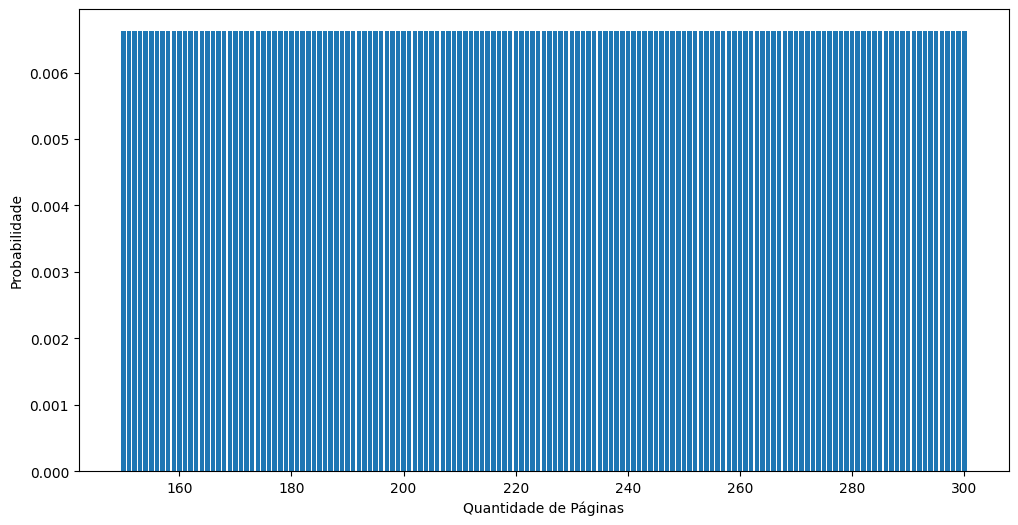

In [2]:
valores = np.arange(150, 301)

plt.figure(figsize=(12,6))
plt.bar(valores, [1/len(valores)]*len(valores)) 
plt.xlabel('Quantidade de Páginas')
plt.ylabel('Probabilidade')
plt.show()

Aqui eu fiz um plot simples usando os valores entre 150 e 300, onde a quantidade de paginas tem igual probabilidade.

## (ii)

In [3]:
a = 150
b = 300

mu = (a + b) / 2
var = ((b - a + 1)**2 - 1) / 12
std= var**0.5

print(f"Média: {mu}")
print(f"Variância: {var}")
print(f"Desvio padrão: {std}")


Média: 225.0
Variância: 1900.0
Desvio padrão: 43.58898943540674


usei as fórmulas no site da wikipedia dado. Foi definido a e b, onde são o min e o max das paginas.

## (iii) 

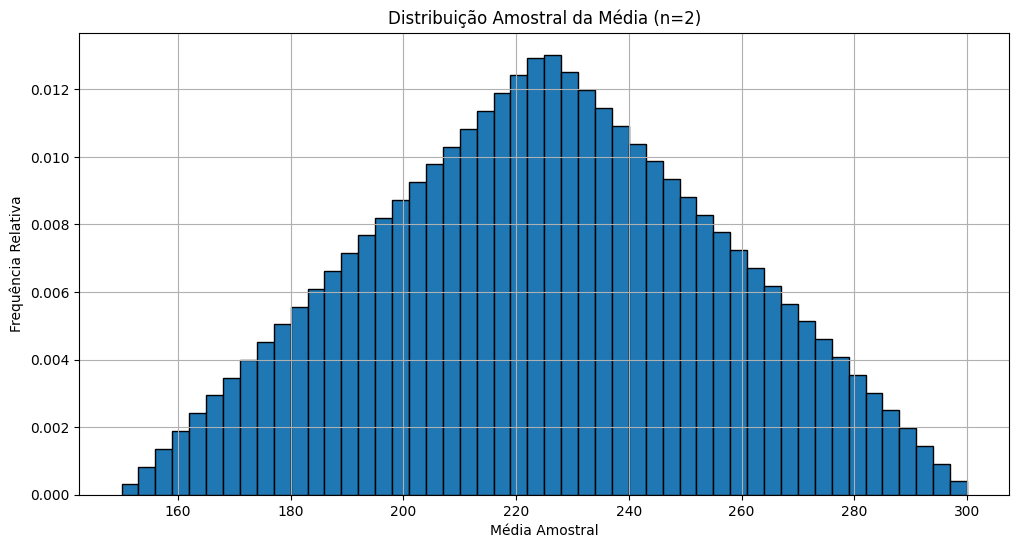

In [4]:
amostras = list(itertools.product(valores, repeat=2))

medias_amostrais = [sum(amostra) / 2 for amostra in amostras]

plt.figure(figsize=(12,6))
plt.hist(medias_amostrais, bins=50, density=True, edgecolor='black')
plt.title('Distribuição Amostral da Média (n=2)')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência Relativa')
plt.grid(True)
plt.show()


esse valores são todos os valores entre 150 e 300, e é feito todas as combinações de 2 possiveis com reposição, dps é feito a media dessa amostra. E então fço um plot com essas medias amostrais.

## (iv) 

In [5]:
mu_x = np.mean(medias_amostrais)
var_x = np.var(medias_amostrais)
std_x = var_x**0.5

print(f"Média: {mu_x}")
print(f"Variância: {var_x}")
print(f"Desvio padrão: {std_x}")


Média: 225.0
Variância: 950.0
Desvio padrão: 30.822070014844883


usei o mean e o var do numpy para calculo da media e variancia, e o desvio padrão só tirei a raiz da variancia.

## (v) 

In [6]:
n = 2

var_teorico = var / n
std_teorico = std / (n**0.5)

print(f"Média teórica: {mu}")
print(f"Variância teórica: {var_teorico}")
print(f"Desvio padrão teórico: {std_teorico}")

Média teórica: 225.0
Variância teórica: 950.0
Desvio padrão teórico: 30.822070014844883


* a media teorica é igual a original<br>
* a variancia teorica usa o valor da variancia original dividida pelo n<br>
* o desvio padrao teorico é o desvio padrao original sobre raiz de n

calculei isso e printei na tela


## (vi)

### (a)

In [36]:
total_amostras = len(valores) ** 9
print(f"Total de amostras diferentes: {total_amostras}")

Total de amostras diferentes: 40812436757196811351


peguei o numero de amostras e elevei em 9. Na mão daria muito trabalho e muito tempo, não faz sentido, com o computador é trivial.

### (b)

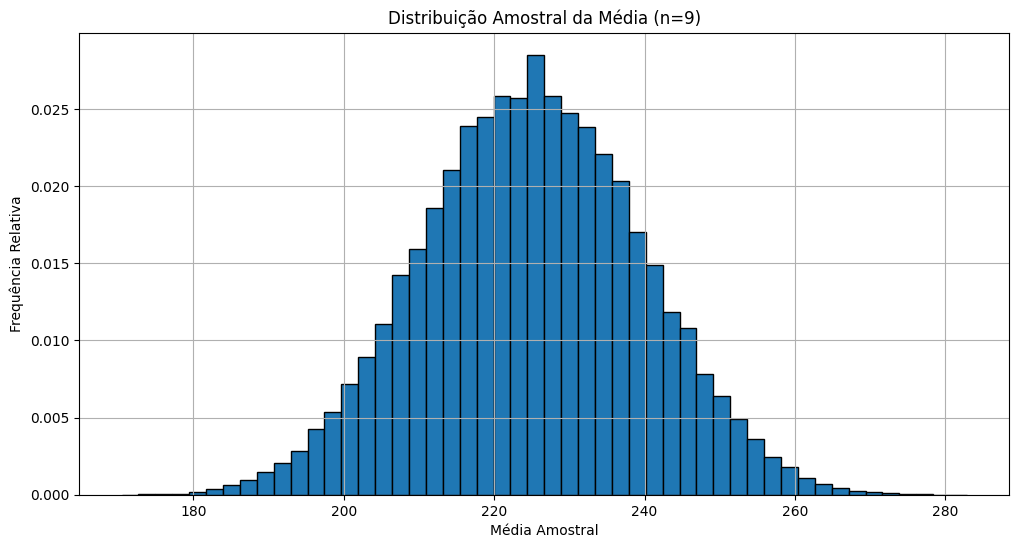

In [8]:
num_simulacoes = 100000

medias_amostrais_n9 = [sum(random.choices(valores, k=9)) / 9 for _ in range(num_simulacoes)]

plt.figure(figsize=(12,6))
plt.hist(medias_amostrais_n9, bins=50, density=True, edgecolor='black')
plt.title('Distribuição Amostral da Média (n=9)')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência Relativa') 
plt.grid(True)
plt.show()


aqui to usando um total de 10.000 simulações, depois faço uma media dessas simulações pegando valores aleatórios e fiz o plot.

# (2) Problema dos tanques alemães

## (i) 

In [ ]:
amostra = [17, 32, 45, 59, 88]
k = len(amostra)
M = max(amostra)

N_est = M + (M / k) - 1
print(f"Estimativa pontual de N: {N_est}")

Estimativa pontual de N: 104.6


apliqueia a fórmula dada na questão com a amostra dada.<br>
* k recebe o tamanho da amostra
* M recebe o maior valor da amostra

depois só aplicar a fórmula

## (ii)


In [10]:
N_real = 100
populacao = list(range(1, N_real + 1))

n_simulacoes = 10000
estimativas = []

for _ in range(n_simulacoes):
    amostra_simulada = random.sample(populacao, k=5)
    M_simulado = max(amostra_simulada)
    N_simulado = M_simulado + (M_simulado / 5) - 1
    estimativas.append(N_simulado)

estimativas = np.array(estimativas)
print(f"Estimativas: {(estimativas)}")

Estimativas: [ 96.2  93.8 103.4 ... 111.8  93.8  62.6]


o N_real é o numero de tanques total, a população é uma lista com cada um desses tanques numerados de 1 a 101.<br>
o n_simulacoes é o numero de vezes que ira entrar no for.<br>
<br>
Dentro do for ele vai fazer uma amostra simulada de 5 tanques aleatorios dentre os 100, vai pegar o maior dentre esses 5 e então aplicar a mesma formula de antes.<br> 
então no final ele adiciona esse resultado no estimativas para salvar todos os 10.000 resultados.

## (iii) 

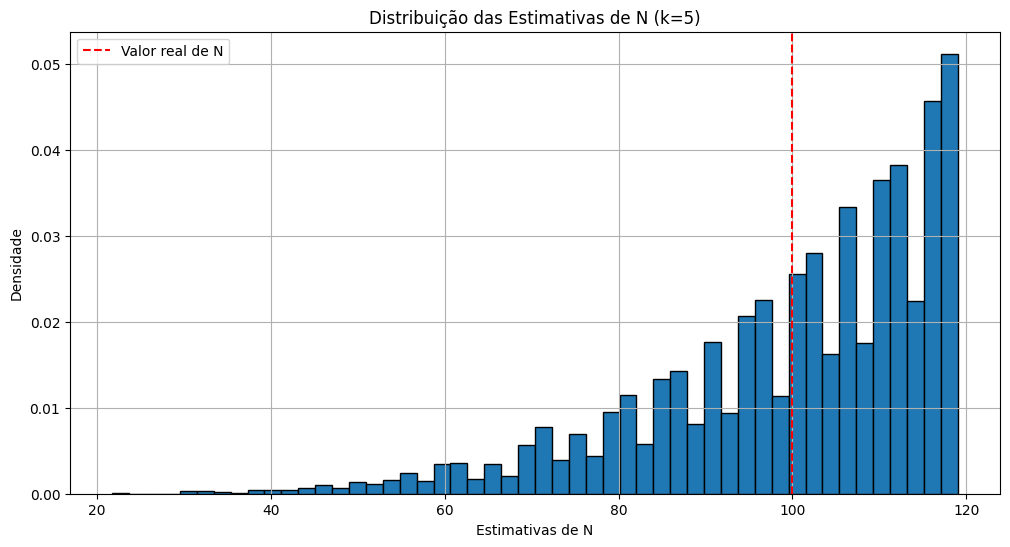

In [11]:
# Histograma
plt.figure(figsize=(12,6))
plt.hist(estimativas, bins=50, density=True, edgecolor='black')
plt.title('Distribuição das Estimativas de N (k=5)')
plt.xlabel('Estimativas de N')
plt.ylabel('Densidade')
plt.axvline(N_real, color='red', linestyle='dashed', label='Valor real de N')
plt.legend()
plt.grid(True)
plt.show()

plot da questão anterior. Da para reparar que ele costuma dar uma superestimada nos valores, tendo mais proximo de 120 quando o valor real de N é maior.

## (iv)

In [39]:
media_est = np.mean(estimativas)
variancia_est = np.var(estimativas)
desvio_padrao_est = np.std(estimativas)

print(f"Média das estimativas: {media_est}")    
print(f"Variância das estimativas: {variancia_est}")
print(f"Desvio padrão das estimativas: {desvio_padrao_est}")


Média das estimativas: 99.99332000000001
Variância das estimativas: 270.11397137759997
Desvio padrão das estimativas: 16.435144397832346


*media_est é a media das estimativas da outra questão<br>
*variancia_est é a variancia das estimativas<br>
*desvio_padrao_est é o desvio padrão das estimativas<br>

a variancia de 276, mostra que ainda assim tem uma variação grande entre as amostras, porem msm assim a media ficou ali batendo em 99.9 que é bem próximo aos 100 originais, ficou bem fiel



## (v) 

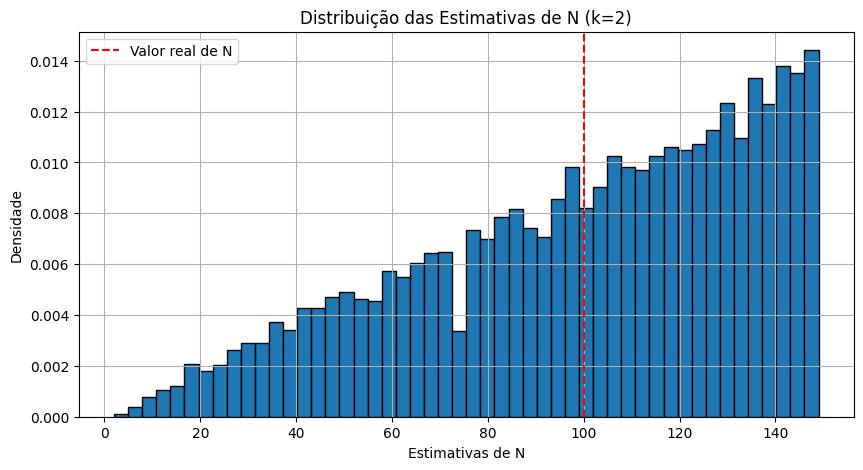

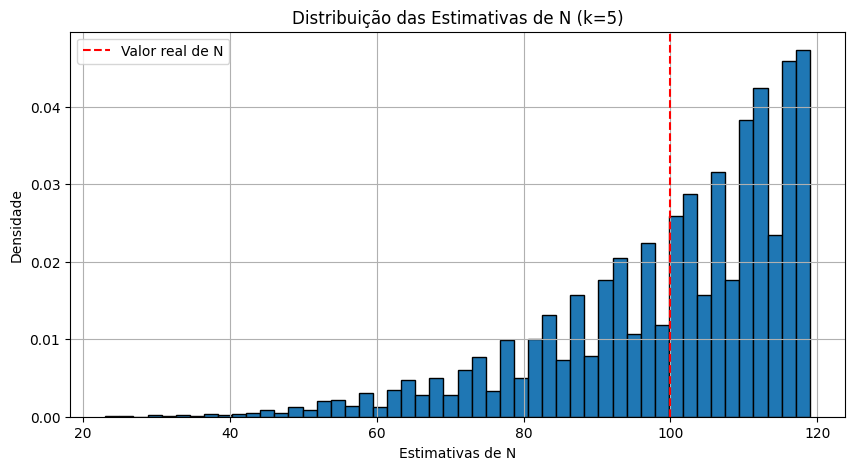

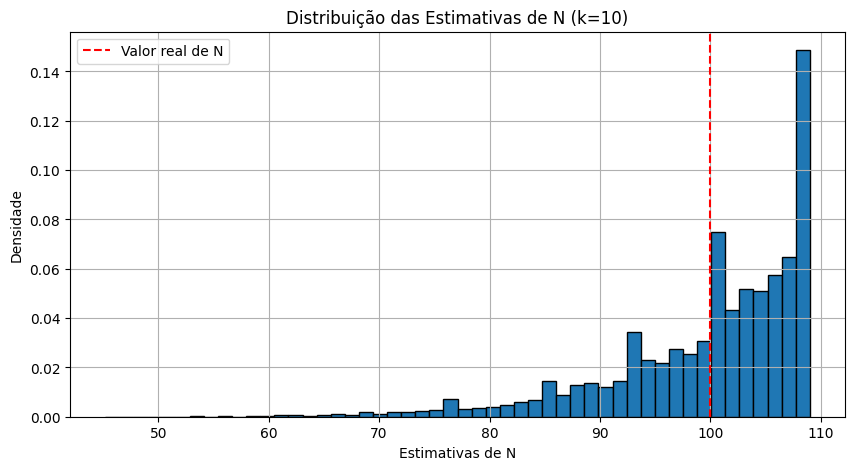

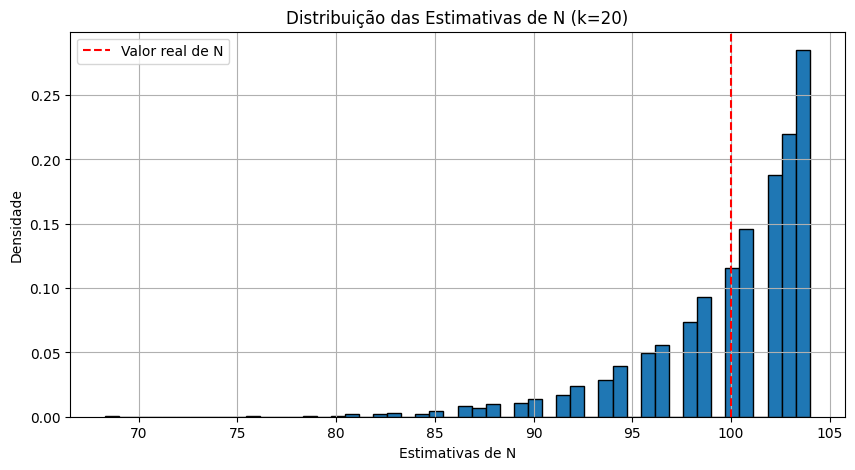

In [13]:
tamanhos_amostra = [2, 5, 10, 20]
resultados = {}

for k_atual in tamanhos_amostra:
    estimativas_temp = []
    for _ in range(n_simulacoes):
        amostra_simulada = random.sample(populacao, k=k_atual)
        M_simulado = max(amostra_simulada)
        N_simulado = M_simulado + (M_simulado / k_atual) - 1
        estimativas_temp.append(N_simulado)
    resultados[k_atual] = np.array(estimativas_temp)

for k_atual in tamanhos_amostra:
    plt.figure(figsize=(10,5))
    plt.hist(resultados[k_atual], bins=50, density=True, edgecolor='black')
    plt.title(f'Distribuição das Estimativas de N (k={k_atual})')
    plt.xlabel('Estimativas de N')
    plt.ylabel('Densidade')
    plt.axvline(N_real, color='red', linestyle='dashed', label='Valor real de N')
    plt.legend()
    plt.grid(True)
    plt.show()

o código em si, é ele repetindo os calculos anteriores, porem com um for para cada tamanho de amostra na lista e plotando isso tudo.<br>
<br>
Da para perceber uma clara tendencia a fidelidade quanto maior o numero da amostra a densidade do N fica mais proxima de 1.

## (vi)

In [14]:
conf_inferior = np.percentile(estimativas, 40)
conf_superior = np.percentile(estimativas, 60)

print(f"Intervalo de confiança 20%: [{conf_inferior}, {conf_superior}]")
print(f"O valor real de N={N_real} está dentro do intervalo? {'Sim' if conf_inferior <= N_real <= conf_superior else 'Não'}")


Intervalo de confiança 20%: [99.8, 108.2]
O valor real de N=100 está dentro do intervalo? Sim


intervalo de confiança de 20%, então 10 pra cima e 10 pra baixo a partir do meio.

como o valor real é 100, ele ficou dentro, porem por pouco.

## (vii) Contextualização histórica

Aparentemente durante a segunda guerra, tinham feito uma estimativa da produção de tanques inimigos, porem fizeram calculos estatisticos tambem e provaram que aquele numero era bem menor do que o que com as informações que eles achavam que tinham antes. Resumindo, a estatistica fui crucial para historia do mundo.

# (3) Diferença de médias

In [15]:
mu1 = 50   
sigma1_squared = 25  

mu2 = 40   
sigma2_squared = 24  

n1 = 10  
n2 = 8  

num_simulacoes = 10000

np.random.seed(42) 
M1 = np.random.normal(loc=mu1, scale=np.sqrt(sigma1_squared), size=(num_simulacoes, n1)).mean(axis=1)
M2 = np.random.normal(loc=mu2, scale=np.sqrt(sigma2_squared), size=(num_simulacoes, n2)).mean(axis=1)

Md = M1 - M2

só criação das variáveis, configurações iniciais.

## (i)

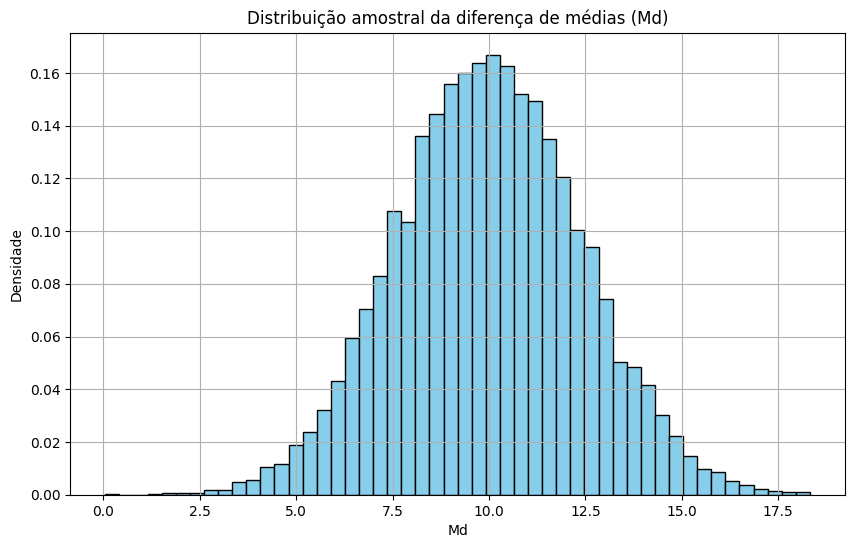

In [16]:
plt.figure(figsize=(10,6))
plt.hist(Md, bins=50, color='skyblue', edgecolor='black', density=True)
plt.title('Distribuição amostral da diferença de médias (Md)')
plt.xlabel('Md')
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

Distribuição da diferneça de media das amostras, da para reparar que é uma distribuição normal.

## (ii)

In [17]:
media_Md = np.mean(Md)
desvio_padrao_Md = np.std(Md)

print(f"Média aproximada de Md: {media_Md}")
print(f"Desvio padrão aproximado de Md: {desvio_padrao_Md}")

Média aproximada de Md: 9.98977138905691
Desvio padrão aproximado de Md: 2.386931670287978


## (iii)

In [18]:
# Calculando a probabilidade usando a distribuição simulada
probabilidade = np.mean(Md >= 15)

print(f"Probabilidade de Md ser maior ou igual a 15: {probabilidade*100}%")

Probabilidade de Md ser maior ou igual a 15: 1.8399999999999999%


probabilidade da diferneça ser maior que 15. basicamente só faço uma média dos casos que são maior que 15.

# (4) Áudio ou texto?

In [19]:
dados = pd.read_csv('SchroederEpley2015data.txt', sep=',')

Sa = dados[dados['CONDITION'] == 1]['Intellect_Rating']
St = dados[dados['CONDITION'] == 0]['Intellect_Rating']

só carregamento dos dados e separando os CONDITIONs

## (i)

In [20]:
print(f"Sa (Audio) - Media: {Sa.mean():.2f}, Tamanho: {Sa.count()}")
print(f"St (Transcrição) - Media: {St.mean():.2f}, Tamanho: {St.count()}")


Sa (Audio) - Media: 5.63, Tamanho: 21
St (Transcrição) - Media: 3.65, Tamanho: 18


mostrando a quantidade de Sa e St e suas respectivas medias

## (ii)

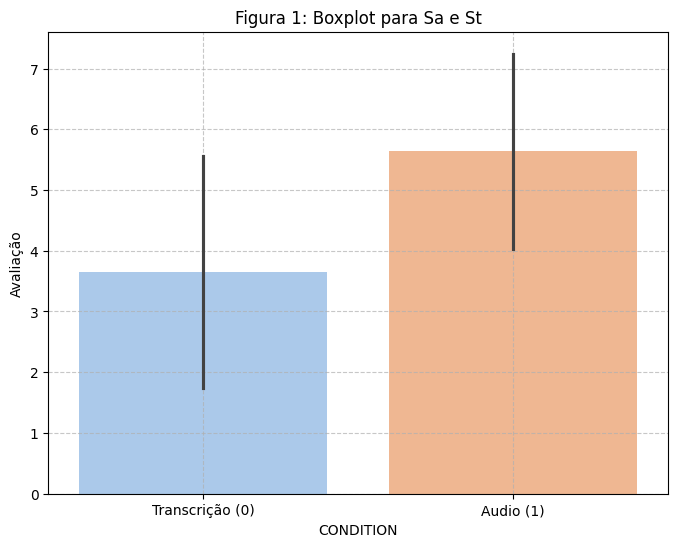

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(x='CONDITION', y='Intellect_Rating', data=dados,legend=False, errorbar='sd',hue='CONDITION', palette='pastel')
plt.xticks([0, 1], ['Transcrição (0)', 'Audio (1)'])
plt.xlabel('CONDITION')
plt.ylabel('Avaliação')
plt.title('Figura 1: Boxplot para Sa e St')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


plot do Boxplot<br>
<br>
é possivel ver que a variancia da transcrição é levemente maior q a de audio, mas quase iguais, porem a media do audio é maior, então o audio tende a ter avaliações melhores com mais consistencia.

## (iii)

In [22]:
shapiro_Sa = stats.shapiro(Sa)
shapiro_St = stats.shapiro(St)

print(f"Teste para Sa (Audio): p-valor = {shapiro_Sa.pvalue:.4f}")
print(f"Teste para St (Transcrição): p-valor = {shapiro_St.pvalue:.4f}")

Teste para Sa (Audio): p-valor = 0.1737
Teste para St (Transcrição): p-valor = 0.4448


usei o teste do Shapiro, o St ta proximo de 0,5 enquanto o Sa ta proximo de 0.1. a transcrição ta bem mais proximo de uma normal.

## (iv)

In [23]:
conf_level = 0.99

#Sa
mean_Sa = np.mean(Sa)
sem_Sa = stats.sem(Sa)
interval_Sa = stats.t.interval(conf_level, len(Sa)-1, loc=mean_Sa, scale=sem_Sa)

#St
mean_St = np.mean(St)
sem_St = stats.sem(St)
interval_St = stats.t.interval(conf_level, len(St)-1, loc=mean_St, scale=sem_St)

print(f"Intervalo de confiança de 99% para Sa (Audio): ({float(interval_Sa[0]):.2f}, {float(interval_Sa[1]):.2f})")
print(f"Intervalo de confiança de 99% para St (Transcrição): ({float(interval_St[0]):.2f}, {float(interval_St[1]):.2f})")

Intervalo de confiança de 99% para Sa (Audio): (4.64, 6.63)
Intervalo de confiança de 99% para St (Transcrição): (2.34, 4.95)


com esse intervalo de confiança de 99, é possivel ver o max da media do St é quase o min da media do Sa provando que o audio de novo tende a ser melhor

## (v)

é valida, porque esses intervalos quase não estão se sobressaindo, mostrando dominancia do audio.


# (5) Intervalo de confiança para altura média

In [24]:
df_survey = pd.read_csv('survey.csv')

df_survey.head()

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


só carregamento dos dados.

In [25]:
df_survey = df_survey.dropna(subset=['Height'])

print(f"Número de estudantes com altura registrada: {len(df_survey)}")

Número de estudantes com altura registrada: 209


tirando dados nulos

In [26]:
heights = df_survey['Height']

n = len(heights)                 
mean_height = np.mean(heights)    
std_height = np.std(heights, ddof=1)  

print(f"Média das alturas: {mean_height:.2f} cm")
print(f"Desvio padrão das alturas: {std_height:.2f} cm")

Média das alturas: 172.38 cm
Desvio padrão das alturas: 9.85 cm


peguei a coluna Height e calculei, tamanho, media e desvio padrao

## (i)

In [27]:
confidence = 0.95

t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)
margin_of_error_t = t_critical * (std_height / np.sqrt(n))

ci_t = (mean_height - margin_of_error_t, mean_height + margin_of_error_t)

print(f"Intervalo de confiança 95% usando t-Student: ({ci_t[0]:.2f} cm, {ci_t[1]:.2f} cm)")

Intervalo de confiança 95% usando t-Student: (171.04 cm, 173.72 cm)


calculando o intervalo de confiança com 95% usando o t de Studant

## (ii) 

In [28]:
z_critical = stats.norm.ppf((1 + confidence) / 2)
margin_of_error_z = z_critical * (std_height / np.sqrt(n))

ci_z = (mean_height - margin_of_error_z, mean_height + margin_of_error_z)

print(f"Intervalo de confiança 95% usando z-score: ({ci_z[0]:.2f} cm, {ci_z[1]:.2f} cm)")

Intervalo de confiança 95% usando z-score: (171.05 cm, 173.72 cm)


mesma coisa, porem com z-core agora

## (iii)

Análise Comparativa:
* Intervalo com t-Student: 171.04 cm a 173.72 cm
* Intervalo com z-score: 171.05 cm a 173.72 cm

Basicamente, os resultados foram quase identicos, tendendo levemente ao t-Student ser um pouco maior, provavelmente se da pela variancia

# (6) Intervalo de confiança para proporção

## (i)

In [ ]:
hand_counts = df_survey['W.Hnd'].value_counts()

n_right = hand_counts.get('Right', 0)
n_left = hand_counts.get('Left', 0)

print(f"Destros: {n_right}")
print(f"Canhotos: {n_left}")

if n_right >= 10 and n_left >= 10:
    print("Tem 10 estudantes destros e 10 canhotos.")
else:
    print("Não tem 10 estudantes destros e 10 canhotos.")

Destros: 192
Canhotos: 16
Tem 10 estudantes destros e 10 canhotos.


peguei todos os valores de W.Hnd, divide eles entre variaveis de right e left. Depois só fiz um if para verificar

## (ii) 

In [ ]:
n_total = n_right + n_left
p_hat = n_left / n_total

confidence_90 = 0.90

z_90 = stats.norm.ppf((1 + confidence_90) / 2)

margin_error_90 = z_90 * np.sqrt((p_hat * (1 - p_hat)) / n_total)

ci_90 = (p_hat - margin_error_90, p_hat + margin_error_90)

print(f"Intervalo de confiança 90% : ({ci_90[0]:.4f}, {ci_90[1]:.4f})")

Intervalo de confiança 90% : (0.0465, 0.1073)


peguei o numero total, depois peguei a porcentagem do numero de total de canhotos baseado no numero total.<br>
calculaei a margem de erro de 90% e fiz o intervalo e printei.<br>
<br>
Esse intervalo é extremamente baixo, mostrando que a quantidade de canhotos realmente é bem a baixo que a de destros

## (iii)

In [31]:
confidence_95 = 0.95
z_95 = stats.norm.ppf((1 + confidence_95) / 2)

margin_error_95 = z_95 * np.sqrt((p_hat * (1 - p_hat)) / n_total)

ci_95 = (p_hat - margin_error_95, p_hat + margin_error_95)

print(f"Intervalo de confiança 95% : ({ci_95[0]:.4f}, {ci_95[1]:.4f})")

Intervalo de confiança 95% : (0.0407, 0.1131)


Basicamente mesmo calculo, porem com 95% e o intervalo aumentou, mas ainda muito pouco, reforçando o ponto anterior

## (iv) 

### Verificando se existem pelo menos 10 homens e 10 mulheres

In [32]:
sex_counts = df_survey['Sex'].value_counts()

n_male = sex_counts.get('Male', 0)
n_female = sex_counts.get('Female', 0)

print(f"Homens: {n_male}")
print(f"Mulheres: {n_female}")

if n_male >= 10 and n_female >= 10:
    print("Tem 10 estudantes homens e 10 mulheres.")
else:
    print("Não tem 10 estudantes homens e 10 mulheres")

Homens: 106
Mulheres: 102
Tem 10 estudantes homens e 10 mulheres.


### Intervalo de confiança 90% para proporção de estudantes homens

In [33]:
n_sex_total = n_male + n_female

p_hat_sex = n_male / n_sex_total

margin_error_sex_90 = z_90 * np.sqrt((p_hat_sex * (1 - p_hat_sex)) / n_sex_total)

ci_sex_90 = (p_hat_sex - margin_error_sex_90, p_hat_sex + margin_error_sex_90)

print(f"Intervalo de confiança 90% : ({ci_sex_90[0]:.4f}, {ci_sex_90[1]:.4f})")

Intervalo de confiança 90% : (0.4526, 0.5666)


mesmo calculo, porem agora o resultado já foi bem proximo ali de 50% mostrando que tanto homem quanto mulher provavelmente estão em numeros parecidos

### Intervalo de confiança 95% para proporção de estudantes homens

In [34]:
margin_error_sex_95 = z_95 * np.sqrt((p_hat_sex * (1 - p_hat_sex)) / n_sex_total)

ci_sex_95 = (p_hat_sex - margin_error_sex_95, p_hat_sex + margin_error_sex_95)

print(f"Intervalo de confiança 95% : ({ci_sex_95[0]:.4f}, {ci_sex_95[1]:.4f})")

Intervalo de confiança 95% : (0.4417, 0.5776)


area aumentou um pouco, mas igualmente tanto pra cima quanto pra baixo, mostrando que o valor real é bem proximo de 50% tanto pra homem quanto mulher

## (v) Verificar se é possível ter erro amostral de apenas 2% para sexo

In [35]:
E_desejado = 0.02

E_real = z_90 * np.sqrt((p_hat_sex * (1 - p_hat_sex)) / n_sex_total)

print(f"Erro amostral real com 90%): {E_real:.4f}")

if E_real <= E_desejado:
    print("Sim, da para fazer.")
else:
    print("Não, a amostra não é suficiente.")

Erro amostral real com 90%): 0.0570
Não, a amostra não é suficiente.


primeiro fiz o erro amostral com os 90% e depois comparei com os 0.02, porem é possivel ver que o real fica entorno de 5% então não é suficiente